# 6.1 Generalizing our definition of vectors

## 6.1.1 Creating a class for 2D coordinate vectors

In [1]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)

In [2]:
v = Vec2(3,4) # <1>
w = v.add(Vec2(-2,6)) # <2>
print(w.x) # <3>

1


In [3]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y

## 6.1.2 Improving the Vec2 class

In [4]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __add__(self, v2):
        return self.add(v2)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self,scalar): #1
        return self.scale(scalar)

In [5]:
# nice syntax
3.0 * Vec2(1,0) + 4.0 * Vec2(0,1)

In [6]:
class Vec2():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self, v2):
        return Vec2(self.x + v2.x, self.y + v2.y)
    def scale(self, scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __add__(self, v2):
        return self.add(v2)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self,scalar): #1
        return self.scale(scalar)
    def __repr__(self):
        return "Vec2({},{})".format(self.x,self.y)

In [7]:
# nice repr
3.0 * Vec2(1,0) + 4.0 * Vec2(0,1)

Vec2(3.0,4.0)

## 6.1.3 Repeating the process with 3D vectors

In [8]:
class Vec3():
    def __init__(self,x,y,z): #1
        self.x = x
        self.y = y
        self.z = z
    def add(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    def scale(self, scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    def __add__(self, other):
        return self.add(other)
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self,scalar):
        return self.scale(scalar)
    def __repr__(self):
        return "Vec3({},{},{})".format(self.x,self.y, self.z)

In [9]:
2.0 * (Vec3(1,0,0) + Vec3(0,1,0))

Vec3(2.0,2.0,0.0)

In [10]:
def average(v1,v2):
    return 0.5 * v1 + 0.5 * v2

In [11]:
average(Vec2(9.0, 1.0), Vec2(8.0,6.0))

Vec2(8.5,3.5)

In [12]:
average(Vec3(1,2,3), Vec3(4,5,6))

Vec3(2.5,3.5,4.5)

## 6.1.4 Building a Vector base class

In [13]:
from abc import ABCMeta, abstractmethod

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass

In [14]:
## won't work
# v = Vector()

In [15]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)

In [16]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [17]:
# give it a subtract method
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)

In [18]:
Vec2(1,3) - Vec2(5,1)

Vec2(-4,2)

## 6.1.5 Defining vector spaces

## 6.1.6 Unit testing vector space classes

In [19]:
s = -3
u, v = Vec2(42,-10), Vec2(1.5, 8)
s * (u + v) == s * v + s * u

True

In [20]:
from random import uniform

def random_scalar():
    return uniform(-10,10)

def random_vec2():
    return Vec2(random_scalar(),random_scalar())

a = random_scalar()
u, v = random_vec2(), random_vec2()
## below assertion will probably fail
# assert a * (u + v) == a * v + a * u

In [21]:
from math import isclose

def approx_equal_vec2(v,w):
    return isclose(v.x,w.x) and isclose(v.y,w.y) #1

for _ in range(0,100): #2
    a = random_scalar()
    u, v = random_vec2(), random_vec2()
    assert approx_equal_vec2(a * (u + v), a * v + a * u) #3

In [22]:
def test(eq, a, b, u, v, w): #<1>
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))

In [23]:
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec2(), random_vec2(), random_vec2()
    test(approx_equal_vec2, a,b,u,v,w)

## 6.1.7 Exercises

**EXERCISE:** Implement a `Vec3` class inheriting from `Vector.`

In [24]:
class Vec3(Vector):
    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z
    def add(self,other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    def scale(self,scalar):
        return Vec3(scalar * self.x, scalar * self.y, scalar * self.z)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    def __repr__(self):
        return "Vec3({},{},{})".format(self.x, self.y, self.z)

**MINI-PROJECT:** Implement a `CoordinateVector` class inheriting from `Vector`, with an abstract property representing the dimension.  This should save repeated work implementing specific coordinate vector classes; all you should need to do to implement a Vec6 class should be inheriting from `CoordinateVector` and setting the dimension to 6.

In [25]:
from abc import abstractproperty
from vectors import add, scale

class CoordinateVector(Vector):
    @abstractproperty
    def dimension(self):
        pass
    def __init__(self,*coordinates):
        self.coordinates = tuple(x for x in coordinates)
    def add(self,other):
        return self.__class__(*add(self.coordinates, other.coordinates))
    def scale(self,scalar):
        return self.__class__(*scale(scalar, self.coordinates))
    def __repr__(self):
        return "{}{}".format(self.__class__.__qualname__, self.coordinates)

In [26]:
class Vec6(CoordinateVector):
    def dimension(self):
        return 6

In [27]:
Vec6(1,2,3,4,5,6) + Vec6(1, 2, 3, 4, 5, 6)

Vec6(2, 4, 6, 8, 10, 12)

**EXERCISE:** Add a `zero` abstract method to `Vector`, designed to return the zero vector in a given vector space, as well as an implementation for the negation operator.  These are useful, because we’re required to have a zero vector and negations of any vector in a vector space.

In [28]:
from abc import ABCMeta, abstractmethod, abstractproperty

class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    @classmethod    #1
    @abstractproperty #2
    def zero():
        pass
    def __neg__(self): #3
        return self.scale(-1)

In [29]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

**EXERCISE:** Write unit tests to show that the addition and scalar multiplication operations for `Vec3` satisfy the vector space properties.

In [31]:
def random_vec3():
    return Vec3(random_scalar(),random_scalar(),random_scalar())

def approx_equal_vec3(v,w):
    return isclose(v.x,w.x) and isclose(v.y,w.y) and isclose(v.z, w.z)
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec3(), random_vec3(), random_vec3()
    test(approx_equal_vec3,a,b,u,v,w)

**EXERCISE:** Add unit tests to check that $0 + \vec{v} = \vec{v}$, $0 \cdot \vec{v} = 0$, and $-\vec{v} + \vec{v} = 0$ for any vector $\vec{v}$.

In [34]:
def test(zero, eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))
    #new tests
    assert eq(zero + v, v)
    assert eq(0 * v, zero)
    assert eq(-v + v, zero)
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_vec2(), random_vec2(), random_vec2()
    test(Vec2.zero(), approx_equal_vec2, a,b,u,v,w)

**EXERCISE:** As equality is implemented above for `Vec2` and `Vec3`, it turns out that `Vec2(1,2) == Vec3(1,2,3)` returns `True`.  Python’s duck typing is too forgiving for its own good!  Fix this by adding a check that classes match before testing vector equality.

In [35]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return (self.__class__ == other.__class__
            and self.x == other.x and self.y == other.y)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

**EXERCISE:** Implement a `__truediv__` function on `Vector`, allowing us to divide vectors by scalars.  We can divide vectors by a non-zero scalar by multiplying them by the reciprocal of the scalar (`1.0/scalar`).

In [36]:
class Vector(metaclass=ABCMeta):
    @abstractmethod
    def scale(self,scalar):
        pass
    @abstractmethod
    def add(self,other):
        pass
    def __mul__(self, scalar):
        return self.scale(scalar)
    def __rmul__(self, scalar):
        return self.scale(scalar)
    def __add__(self,other):
        return self.add(other)
    def subtract(self,other):
        return self.add(-1 * other)
    def __sub__(self,other):
        return self.subtract(other)
    @classmethod    #1
    @abstractproperty #2
    def zero():
        pass
    def __neg__(self): #3
        return self.scale(-1)
    def __truediv__(self, scalar):
        return self.scale(1.0/scalar)

In [37]:
class Vec2(Vector):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def add(self,other):
        assert self.__class__ == other.__class__
        return Vec2(self.x + other.x, self.y + other.y)
    def scale(self,scalar):
        return Vec2(scalar * self.x, scalar * self.y)
    def __eq__(self,other):
        return (self.__class__ == other.__class__
            and self.x == other.x and self.y == other.y)
    def __repr__(self):
        return "Vec2({},{})".format(self.x, self.y)
    def zero():
        return Vec2(0,0)

In [38]:
Vec2(1,2)/2

Vec2(0.5,1.0)

# 6.2 Exploring different vector spaces

## 6.2.1 Enumerating all coordinate vector spaces

In [39]:
class Vec1(Vector):
    def __init__(self,x):
        self.x = x
    def add(self,other):
        return Vec1(self.x + other.x)
    def scale(self,scalar):
        return Vec1(scalar * self.x)
    @classmethod
    def zero(cls):
        return Vec1(0)
    def __eq__(self,other):
        return self.x == other.x
    def __repr__(self):
        return "Vec1({})".format(self.x)

In [40]:
Vec1(2) + Vec1(2)

Vec1(4)

In [41]:
3 * Vec1(1)

Vec1(3)

In [42]:
class Vec0(Vector):
    def __init__(self):
        pass
    def add(self,other):
        return Vec0()
    def scale(self,scalar):
        return Vec0()
    @classmethod
    def zero(cls):
        return Vec0()
    def __eq__(self,other):
        return self.__class__ == other.__class__ == Vec0
    def __repr__(self):
        return "Vec0()"

In [43]:
- 3.14 * Vec0()

Vec0()

In [44]:
Vec0() + Vec0() + Vec0() + Vec0()

Vec0()

## 6.2.2 Identifying vector spaces in the wild

In [45]:
class CarForSale():
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model, source, location, description):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description

In [47]:
from datetime import datetime

class CarForSale(Vector):
    retrieved_date = datetime(2018,11,30,12) #1
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model="(virtual)", source="(virtual)", #2
                 location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
    def add(self, other):
        def add_dates(d1, d2): #3
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        return CarForSale( #4
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
    def scale(self,scalar):
        def scale_date(d): #5
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)

In [48]:
# load cargraph data from json file

from json import loads, dumps
from pathlib import Path
from datetime import datetime
contents = Path('cargraph.json').read_text()
cg = loads(contents)
cleaned = []

def parse_date(s):
    input_format="%m/%d - %H:%M"
    return datetime.strptime(s,input_format).replace(year=2018)
    
    return dt
for car in cg[1:]:
    try:
        row = CarForSale(int(car[1]), float(car[3]), float(car[4]), parse_date(car[6]), car[2],  car[5],  car[7], car[8])
        cleaned.append(row)
    except: pass

cars = cleaned

In [49]:
(cars[0] + cars[1]).__dict__

{'model_year': 4012,
 'mileage': 306000.0,
 'price': 6100.0,
 'posted_datetime': datetime.datetime(2018, 11, 30, 3, 59),
 'model': '(virtual)',
 'source': '(virtual)',
 'location': '(virtual)',
 'description': '(virtual)'}

In [50]:
average_prius = sum(cars, CarForSale.zero()) * (1.0/len(cars))

In [51]:
average_prius.__dict__

{'model_year': 2012.5365853658536,
 'mileage': 87731.63414634147,
 'price': 12574.731707317074,
 'posted_datetime': datetime.datetime(2018, 11, 30, 9, 0, 49, 756098),
 'model': '(virtual)',
 'source': '(virtual)',
 'location': '(virtual)',
 'description': '(virtual)'}

## 6.2.3 Treating functions as vectors

In [57]:
# plotting utility function for functions in this chapter
import numpy as np
import matplotlib.pyplot as plt
from math import sin

def plot(fs, xmin, xmax):
    xs = np.linspace(xmin,xmax,100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    for f in fs:
        ys = [f(x) for x in xs]
        plt.plot(xs,ys)

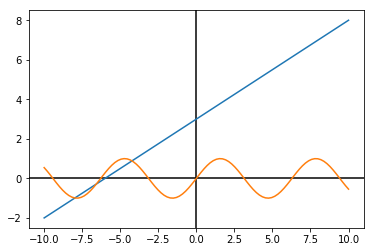

In [58]:
def f(x):
    return 0.5 * x + 3
def g(x):
    return sin(x)
plot([f,g],-10,10)

In [59]:
def add_functions(f,g):
    def new_function(x):
        return f(x) + g(x)
    return new_function

## 6.2.4 Treating matrices as vectors

In [60]:
class Matrix5_by_3(Vector):
    rows = 5 #1
    columns = 3
    def __init__(self, matrix):
        self.matrix = matrix
    def add(self, other):
        return Matrix5_by_3(tuple(
            tuple(a + b for a,b in zip(row1, row2))
            for (row1, row2) in zip(self.matrix, other.matrix)
        ))
    def scale(self,scalar):
        return Matrix5_by_3(tuple(
            tuple(scalar * x for x in row)
            for row in self.matrix
        ))
    @classmethod
    def zero(cls):
        return Matrix5_by_3(tuple( #2
            tuple(0 for j in range(0, cls.columns))
            for i in range(0, cls.rows)
        ))

## 6.2.5 Manipulating images with vector operations

In [62]:
from PIL import Image
class ImageVector(Vector):
    size = (300,300) #1
    def __init__(self,input):
        try:
            img = Image.open(input).resize(ImageVector.size) #2
            self.pixels = img.getdata()
        except:
            self.pixels = input #3
    def image(self):
        img = Image.new('RGB', ImageVector.size) #4
        img.putdata([(int(r), int(g), int(b)) 
                     for (r,g,b) in self.pixels])
        return img
    def add(self,img2): #5
        return ImageVector([(r1+r2,g1+g2,b1+b2) 
                            for ((r1,g1,b1),(r2,g2,b2)) 
                            in zip(self.pixels,img2.pixels)])
    def scale(self,scalar): #6
        return ImageVector([(scalar*r,scalar*g,scalar*b) 
                      for (r,g,b) in self.pixels])
    @classmethod
    def zero(cls): #7
        total_pixels = cls.size[0] * cls.size[1]
        return ImageVector([(0,0,0) for _ in range(0,total_pixels)])
    def _repr_png_(self): #8
        return self.image()._repr_png_()

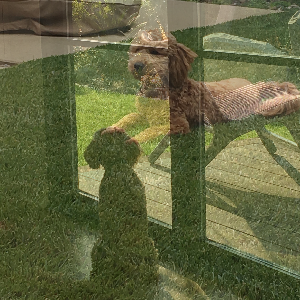

In [63]:
0.5 * ImageVector("inside.JPG") + 0.5 * ImageVector("outside.JPG")

In [64]:
white = ImageVector([(255,255,255) for _ in range(0,300*300)])

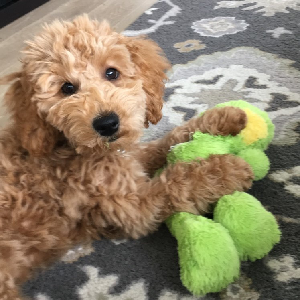

In [65]:
ImageVector("melba_toy.JPG")

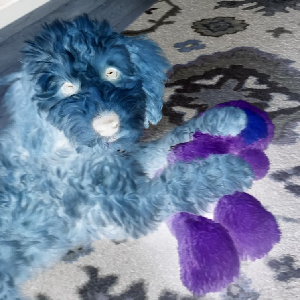

In [66]:
white - ImageVector("melba_toy.JPG")

## 6.2.6 Exercies

**EXERCISE:** Run the vector space unit tests with `u`, `v`, and `w` as floats rather than objects inheriting Vector.  This demonstrates that real numbers are indeed vectors.

In [67]:
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_scalar(), random_scalar(), random_scalar()
    test(0, isclose, a,b,u,v,w)

**EXERCISE:** What is the zero vector for a `CarForSale`?  Implement the `CarForSale.zero()` function to make it available.

In [68]:
class CarForSale(Vector):
    retrieved_date = datetime(2018,11,30,12) #1
    def __init__(self, model_year, mileage, price, posted_datetime, 
                 model="(virtual)", source="(virtual)", #2
                 location="(virtual)", description="(virtual)"):
        self.model_year = model_year
        self.mileage = mileage
        self.price = price
        self.posted_datetime = posted_datetime
        self.model = model
        self.source = source
        self.location = location
        self.description = description
    def add(self, other):
        def add_dates(d1, d2): #3
            age1 = CarForSale.retrieved_date - d1
            age2 = CarForSale.retrieved_date - d2
            sum_age = age1 + age2
            return CarForSale.retrieved_date - sum_age
        return CarForSale( #4
            self.model_year + other.model_year,
            self.mileage + other.mileage,
            self.price + other.price,
            add_dates(self.posted_datetime, other.posted_datetime)
        )
    def scale(self,scalar):
        def scale_date(d): #5
            age = CarForSale.retrieved_date - d
            return CarForSale.retrieved_date - (scalar * age)
        return CarForSale(
            scalar * self.model_year,
            scalar * self.mileage,
            scalar * self.price,
            scale_date(self.posted_datetime)
        )
    @classmethod
    def zero(cls):
        return CarForSale(0, 0, 0, CarForSale.retrieved_date)

**MINI-PROJECT:** Run the vector space unit tests for `CarForSale` to show its objects form a vector space (ignoring their textual attributes).

In [69]:
from math import isclose
from random import uniform, random, randint
from datetime import datetime, timedelta

def random_time():
    return CarForSale.retrieved_date - timedelta(days=uniform(0,10))

def approx_equal_time(t1, t2):
    test = datetime.now()
    return isclose((test-t1).total_seconds(), (test-t2).total_seconds())

def random_car():
    return CarForSale(randint(1990,2019), randint(0,250000), 
              27000. * random(), random_time())

def approx_equal_car(c1,c2):
    return (isclose(c1.model_year,c2.model_year) 
            and isclose(c1.mileage,c2.mileage) 
            and isclose(c1.price, c2.price)
            and approx_equal_time(c1.posted_datetime, c2.posted_datetime))
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_car(), random_car(), random_car()
    test(CarForSale.zero(), approx_equal_car, a,b,u,v,w)

**EXERCISE:** Implement class `Function(Vector)` that takes a function of 1 variable as an argument to its constructor, with a `__call__` implemented so we can treat it as a function.  You should be able to run `plot([f,g,f+g,3*g],-10,10)`.

In [70]:
class Function(Vector):
    def __init__(self, f):
        self.function = f
    def add(self, other):
        return Function(lambda x: self.function(x) + other.function(x))
    def scale(self, scalar):
        return Function(lambda x: scalar * self.function(x))
    @classmethod
    def zero(cls):
        return Function(lambda x: 0)
    def __call__(self, arg):
        return self.function(arg)

In [71]:
f = Function(lambda x: 0.5 * x + 3)
g = Function(sin)

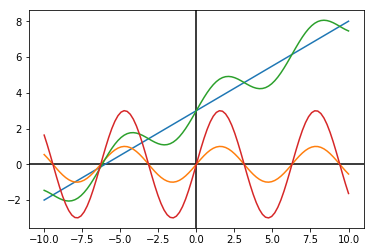

In [72]:
plot([f, g, f+g, 3*g], -10, 10)

**MINI-PROJECT:** Testing equality of functions is difficult.  Do your best to write a function to test whether two functions are equal.

In [73]:
def approx_equal_function(f,g):
    results = []
    for _ in range(0,10):
        x = uniform(-10,10)
        results.append(isclose(f(x),g(x)))
    return all(results)

In [74]:
approx_equal_function(lambda x: (x*x)/x, lambda x: x)

True

**MINI-PROJECT:** Unit test your Function class to demonstrate that functions satisfy the vector space properties.

In [75]:
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for (power,coefficient) in enumerate(self.coefficients))
    def add(self,p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self,scalar):
        return Polynomial([scalar * a for a in self.coefficients])
    def _repr_latex_(self):
        monomials = [repr(coefficient) if power == 0 
                               else "x ^ {%d}" % power if coefficient == 1
                               else "%s x ^ {%d}" % (coefficient,power) 
                               for (power,coefficient) in enumerate(self.coefficients) 
                               if coefficient != 0]
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)

def random_function():
    degree = randint(0,5)
    p = Polynomial(*[uniform(-10,10) for _ in range(0,degree)])
    return Function(lambda x: p(x))

for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_function(), random_function(), random_function()
    test(Function.zero(), approx_equal_function, a,b,u,v,w)

**MINI-PROJECT:** Implement a class `Function2(Vector)` that stores a function of two variables, like $f(x,y) = x + y.$

In [76]:
class Function(Vector):
    def __init__(self, f):
        self.function = f
    def add(self, other):
        return Function(lambda x,y: self.function(x,y) + other.function(x,y))
    def scale(self, scalar):
        return Function(lambda x,y: scalar * self.function(x,y))
    @classmethod
    def zero(cls):
        return Function(lambda x,y: 0)
    def __call__(self, *args):
        return self.function(*args)

In [77]:
f = Function(lambda x,y:x+y)
g = Function(lambda x,y: x-y+1)
(f+g)(3,10)

7

**MINI-PROJECT:** Implement a `Matrix` class inheriting from `Vector` with abstract properties representing number of rows and number of columns.  You should not be able to instantiate a Matrix class, but you could make a `Matrix5_by_3` by inheriting from Matrix and specifying the number of rows and columns explicitly.

In [78]:
class Matrix(Vector):
    @abstractproperty
    def rows(self):
        pass
    @abstractproperty
    def columns(self):
        pass
    def __init__(self,entries):
        self.entries = entries
    def add(self,other):
        return self.__class__(
            tuple(
                tuple(self.entries[i][j] + other.entries[i][j]
                        for j in range(0,self.columns()))
                for i in range(0,self.rows())))
    def scale(self,scalar):
        return self.__class__(
            tuple(
                tuple(scalar * e for e in row) 
                for row in self.entries))
    def __repr__(self):
        return "%s%r" % (self.__class__.__qualname__, self.entries)
    def zero(self):
        return self.__class__(
            tuple(
                tuple(0 for i in range(0,self.columns())) 
                for j in range(0,self.rows())))

In [79]:
class Matrix2_by_2(Matrix):
    def rows(self):
        return 2
    def columns(self):
        return 2  

In [80]:
2 * Matrix2_by_2(((1,2),(3,4))) + Matrix2_by_2(((1,2),(3,4)))

Matrix2_by_2((3, 6), (9, 12))

**EXERCISE:** Unit test the `Matrix5_by_3` class to demonstrate that it obeys the defining properties of a vector space.

In [81]:
def random_matrix(rows, columns):
    return tuple(
        tuple(uniform(-10,10) for j in range(0,columns))
        for i in range(0,rows)
    )

def random_5_by_3():
    return Matrix5_by_3(random_matrix(5,3))
    
def approx_equal_matrix_5_by_3(m1,m2):
    return all([
        isclose(m1.matrix[i][j],m2.matrix[i][j]) 
        for j in range(0,3)
        for i in range(0,5)
    ])
    
for i in range(0,100):
    a,b = random_scalar(), random_scalar()
    u,v,w = random_5_by_3(), random_5_by_3(), random_5_by_3()
    test(Matrix5_by_3.zero(), approx_equal_matrix_5_by_3, a,b,u,v,w)

**EXERCISE:** Convince yourself that the “`zero`” vector for the `ImageVector` class doesn’t visibly alter any image when it is added.

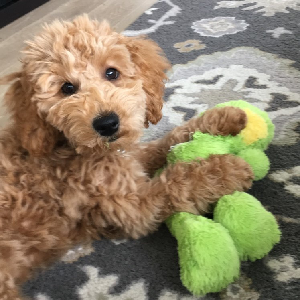

In [82]:
ImageVector("melba_toy.JPG")

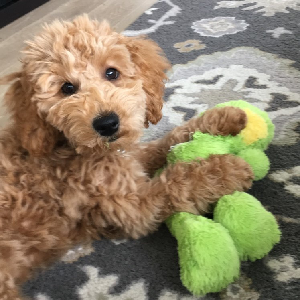

In [83]:
# unchanged
ImageVector("melba_toy.JPG") + ImageVector.zero()

**EXERCISE:** Pick two images and display 10 different weighted averages of them.  These will be “points on a line segment” connecting the images in 270,000-dimensional space!

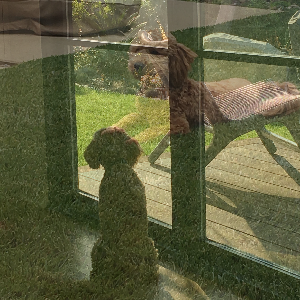

In [84]:
linear_combos = [s * ImageVector("inside.JPG") + (1-s) * ImageVector("outside.JPG")
                    for s in [0.1*i for i in range(0,11)]]

# e.g.
linear_combos[6]

**EXERCISE:** Adapt the vector space unit tests to images, and run them.  What do your randomized unit tests look like as images?

In [85]:
def random_image():
    return ImageVector([(randint(0,255), randint(0,255), randint(0,255))
                            for i in range(0,300 * 300)])

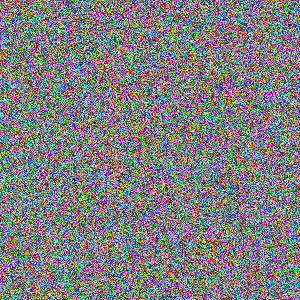

In [86]:
random_image()

In [87]:
def approx_equal_image(i1,i2):
    return all([isclose(c1,c2)
        for p1,p2 in zip(i1.pixels,i2.pixels)
        for c1,c2 in zip(p1,p2)])

In [88]:
## takes a while to run, but succeeds
# for i in range(0,100):
#     a,b = random_scalar(), random_scalar()
#     u,v,w = random_image(), random_image(), random_image()
#     test(ImageVector.zero(), approx_equal_image, a,b,u,v,w)

# 6.3 Looking for smaller vector spaces

## 6.3.5 Finding subspaces of the vector space of functions

In [89]:
class LinearFunction(Vector):
    def __init__(self,a,b):
        self.a = a
        self.b = b
    def add(self,v):
        return LinearFunction(self.a + v.a, self.b + v.b)
    def scale(self,scalar):
        return LinearFunction(scalar * self.a, scalar * self.b)
    def __call__(self,x):
        return self.a * x + self.b
    @classmethod
    def zero(cls):
        return LinearFunction(0,0,0)

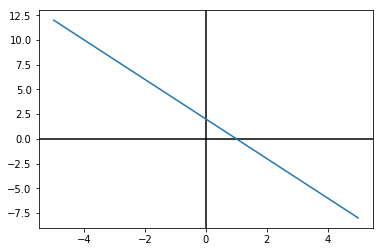

In [90]:
plot([LinearFunction(-2,2)], -5, 5)

In [91]:
gray = ImageVector([(1,1,1) for _ in range(0,300*300)])

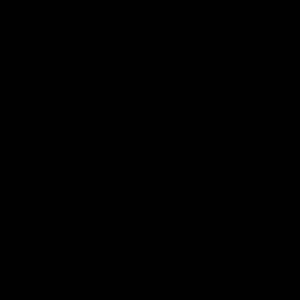

In [92]:
gray

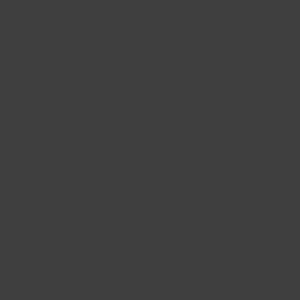

In [93]:
63*gray

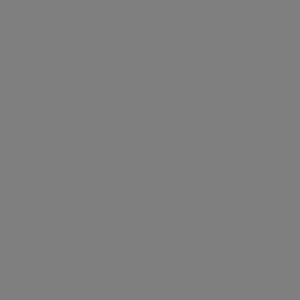

In [94]:
127*gray

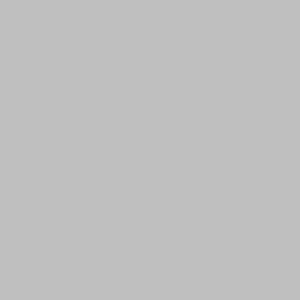

In [95]:
191*gray

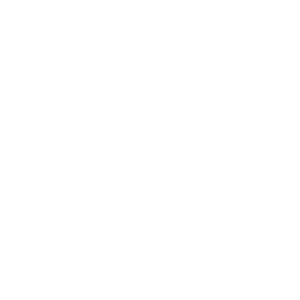

In [96]:
255*gray

## 6.3.6 Exercises

**EXERCISE:** Rebuild the `LinearFunction` class by inheriting from `Vec2` and simply implementing the `__call__` method.

In [97]:
class LinearFunction(Vec2):
    def __call__(self,input):
        return self.x * input + self.y

**MINI-PROJECT:** Implement a class `QuadraticFunction(Vector)` representing the vector subspace of functions of the form $ax^2 + bx + c$.  What is a basis for this subspace?

In [98]:
class QuadraticFunction(Vector):
    def __init__(self,a,b,c):
        self.a = a
        self.b = b
        self.c = c
    def add(self,v):
        return QuadraticFunction(self.a + v.a, self.b + v.b, self.c + v.c)
    def scale(self,scalar):
        return QuadraticFunction(scalar * self.a, scalar * self.b, scalar * self.c)
    def __call__(self,x):
        return self.a * x * x + self.b * x + self.c
    @classmethod
    def zero(cls):
        return QuadraticFunction(0,0,0)

**MINI-PROJECT:** Vector space of all polynomials is an infinite-dimensional subspace -- implement it and describe a basis (which will need to be an infinite set!)

In [99]:
class Polynomial(Vector):
    def __init__(self, *coefficients):
        self.coefficients = coefficients
    def __call__(self,x):
        return sum(coefficient * x ** power for (power,coefficient) in enumerate(self.coefficients))
    def add(self,p):
        return Polynomial([a + b for a,b in zip(self.coefficients, p.coefficients)])
    def scale(self,scalar):
        return Polynomial([scalar * a for a in self.coefficients])
        return "$ %s $" % (" + ".join(monomials))
    @classmethod
    def zero(cls):
        return Polynomial(0)

**EXERCISE:** Write a function `solid_color(r,g,b)` that returns an solid color `ImageVector` with the given red, green, and blue content at every pixel.

In [100]:
def solid_color(r,g,b):
    return ImageVector([(r,g,b) for _ in range(0,300*300)])

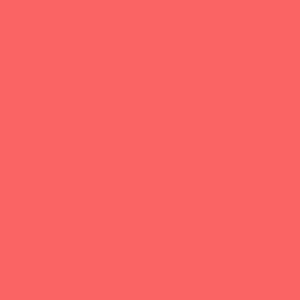

In [101]:
solid_color(250,100,100)

**MINI-PROJECT:** Write a linear map that generates an `ImageVector` from a 30 by 30 grayscale image, implemented as a 30 by 30 matrix of brightness values.  Then, implement the linear map that takes a 300 by 300 image to a 30 by 30 grayscale image by averaging the brightness (average of red, green and blue) at each pixel.

In [102]:
image_size = (300,300)
total_pixels = image_size[0] * image_size[1]
square_count = 30 #<1>
square_width = 10

def ij(n):
    return (n // image_size[0], n % image_size[1])

def to_lowres_grayscale(img): #<2>

    matrix = [
        [0 for i in range(0,square_count)]
        for j in range(0,square_count)
    ]
    for (n,p) in enumerate(img.pixels):
        i,j = ij(n)
        weight = 1.0 / (3 * square_width * square_width)
        matrix[i // square_width][ j // square_width] += (sum(p) * weight)
    return matrix

def from_lowres_grayscale(matrix): #<3>
    def lowres(pixels, ij):
        i,j = ij
        return pixels[i // square_width][ j // square_width]
    def make_highres(limg):
        pixels = list(matrix)
        triple = lambda x: (x,x,x)
        return ImageVector([triple(lowres(matrix, ij(n))) for n in range(0,total_pixels)])
    return make_highres(matrix)

In [103]:
v = ImageVector("melba_toy.JPG")

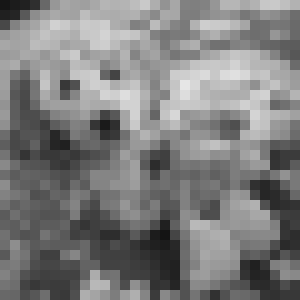

In [104]:
# a 30x30 list of numbers
lowres = to_lowres_grayscale(v)
from_lowres_grayscale(lowres)